# Introduction to Artifical Neural Networks with Keras

## The Perceptron

Scikit-learn's perceptron class used on the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

## Regression MLPs

Example of Scikit-learn's MLP regressor:

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.505332665796845

## Classification MLPs

Example of Scikit-learn's MLP classifier:

In [3]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[8], random_state=42, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X, y)

,steps,"[('standardscaler', ...), ('mlpclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,[8]
,activation,'relu'
,solver,'adam'
,alpha,0.0001


## **Implementing MLPs with Keras**

### Building an Image Classifier Using the Sequential API

load Fashion MNIST dataset

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Look at the shape and data type of the training set:

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

For simplicity, scaling the pixel intensities down to the 0-1 range:

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

List of class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "sneaker", "Bag", "Ankle boot"]

In [9]:
# example first image in the training set represents an ankle boot:
class_names[y_train[0]]

'Ankle boot'

Examples of what is in the dataset:

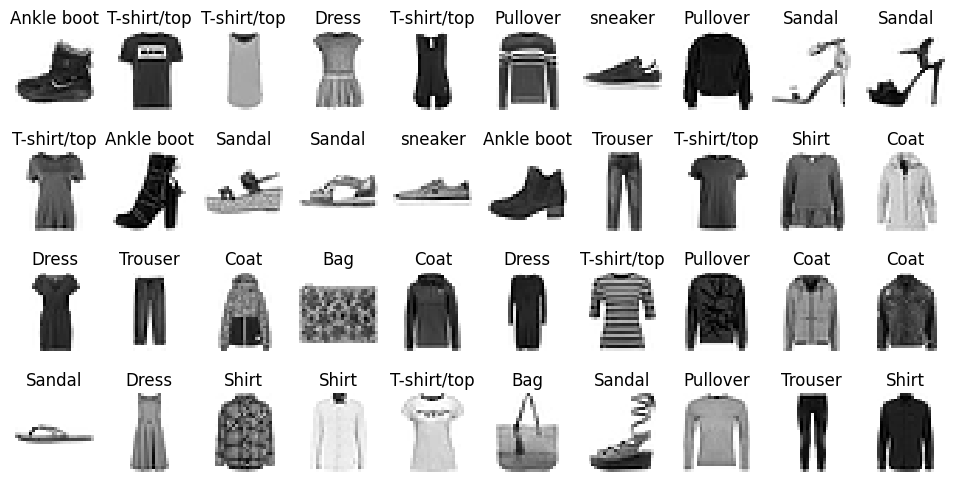

In [10]:
import matplotlib.pyplot as plt

samples = X_train[:40]
plt.figure(figsize=(12,6))
for i, img in enumerate(samples):
    plt.subplot(4,10, i + 1)
    plt.title(class_names[y_train[i]])
    plt.imshow(img, cmap="binary", interpolation="nearest")
    plt.axis("off")

plt.show()

### Creating the model using the sequential API

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Create the same model in another way:

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input([28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

See model's summary (Output shape `None` means the batch size can be anything):

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Generate image of the model:

In [14]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


We can easily get a model's list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [15]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense_3'

In [18]:
model.get_layer("dense_3") is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the
connection weights and the bias terms:

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03868151, -0.00726828,  0.0372545 , ...,  0.01314719,
         0.00076113,  0.03832948],
       [ 0.01775816, -0.03216277,  0.02280318, ..., -0.00142323,
        -0.00918978, -0.06382046],
       [ 0.00045595, -0.04367404, -0.02785006, ..., -0.06619465,
         0.04839942,  0.0536295 ],
       ...,
       [-0.06142346, -0.03205414,  0.02355571, ..., -0.03009264,
        -0.05327256, -0.02374219],
       [-0.00727353,  0.02390987, -0.03341272, ..., -0.02572404,
         0.06987551, -0.04889596],
       [-0.07234774, -0.05415424,  0.04180662, ...,  0.0118783 ,
         0.06949712, -0.05251829]], shape=(784, 300), dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

### Compiling the model

After a model is created, you must call its compile() method to specify the
loss function and the optimizer to use. Optionally, you can specify a list of
extra metrics to compute during training and evaluation:

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7698 - loss: 0.7033 - val_accuracy: 0.8316 - val_loss: 0.5046
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8321 - loss: 0.4856 - val_accuracy: 0.8432 - val_loss: 0.4549
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8460 - loss: 0.4417 - val_accuracy: 0.8486 - val_loss: 0.4314
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8547 - loss: 0.4148 - val_accuracy: 0.8564 - val_loss: 0.4145
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.3948 - val_accuracy: 0.8588 - val_loss: 0.4030
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8666 - loss: 0.3786 - val_accuracy: 0.8578 - val_loss: 0.3925
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0.3649 - val_accuracy: 0.8610 - val_loss: 0.3842
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3529 - 

In [71]:
history.history

{'RootMeanSquaredError': [1.1758426427841187,
  0.7467158436775208,
  0.6585482358932495,
  0.6249399185180664,
  0.604565441608429,
  0.592595100402832,
  0.5911160707473755,
  0.5854986906051636,
  0.5899258255958557,
  0.5915758609771729,
  0.5843876600265503,
  0.5740772485733032,
  0.569507360458374,
  0.5684893727302551,
  0.5674045085906982,
  0.5644022822380066,
  0.5656980872154236,
  0.5652410984039307,
  0.564204216003418,
  0.5613889694213867,
  0.5594814419746399,
  0.5567591786384583,
  0.5544358491897583,
  0.55329829454422,
  0.554343044757843,
  0.5519811511039734,
  0.5539216995239258,
  0.5503339767456055,
  0.5506318211555481,
  0.548437774181366],
 'RootMeanSquaredError_1': [1.0802538394927979,
  0.7561970949172974,
  0.7118849158287048,
  0.6829420924186707,
  0.6511087417602539,
  0.6368957757949829,
  0.6385377645492554,
  0.6405973434448242,
  0.6473103761672974,
  0.6287810802459717,
  0.6300947070121765,
  0.6165821552276611,
  0.6146578788757324,
  0.6115418

Plot graph of the the dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set:

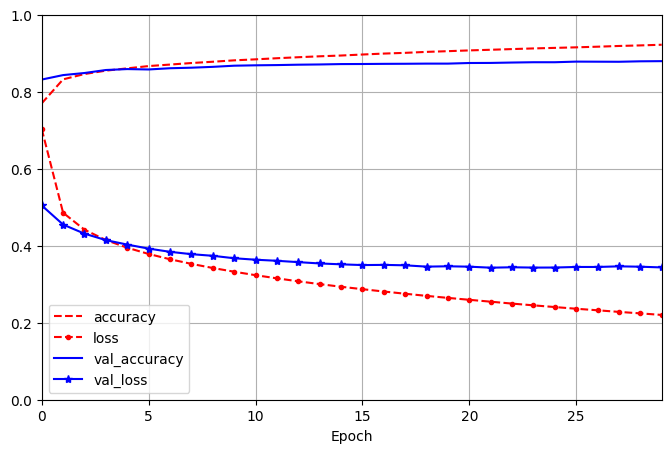

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

If we call fit again, Keras just continues training where it left off:

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9231 - loss: 0.2164 - val_accuracy: 0.8798 - val_loss: 0.3462
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9248 - loss: 0.2128 - val_accuracy: 0.8798 - val_loss: 0.3458
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9259 - loss: 0.2089 - val_accuracy: 0.8808 - val_loss: 0.3460
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9277 - loss: 0.2053 - val_accuracy: 0.8814 - val_loss: 0.3474
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9290 - loss: 0.2018 - val_accuracy: 0.8808 - val_loss: 0.3477
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9301 - loss: 0.1982 - val_accuracy: 0.8812 - val_loss: 0.3475
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9322 - loss: 0.1947 - val_accuracy: 0.8812 - val_loss: 0.3489
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9338 - loss: 0.1913 -

Evaluate model:

In [26]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.3665


[0.36645594239234924, 0.8766000270843506]

### Using the model to make predictions:

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.01, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

get classes with highest estimated probability:

In [28]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Actual answers:

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP using the sequential API 

Doing regression on the California dataset:

In [31]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [32]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.9074 - loss: 0.8233 - val_RootMeanSquaredError: 1.0217 - val_loss: 1.0438
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6229 - loss: 0.3880 - val_RootMeanSquaredError: 0.5844 - val_loss: 0.3415
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5895 - loss: 0.3475 - val_RootMeanSquaredError: 0.5770 - val_loss: 0.3329
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5755 - loss: 0.3312 - val_RootMeanSquaredError: 0.5720 - val_loss: 0.3272
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5669 - loss: 0.3214 - val_RootMeanSquaredError: 0.5582 - val_loss: 0.3116
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5593 - loss: 0.3128 - val_RootMeanSquaredError: 0.6270 - val_loss: 0.3931
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5515 - los

In [33]:
print(mse_test, rmse_test)

0.28607863187789917 0.5348631739616394


### Building complex models using the Functional API

Build a wide and deep neural network:

In [34]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(X_train.shape[1:]) 
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat  = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

What if we want to send a subset of the features through the wide path and a different subste (possibly overlapping) through the deep path? One solution is to use multiple inputs:

Example: send 5 features through the wide path(features 0 to 4), and 6 features through the deep path (features 2 to 7)

In [35]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Compile, split features, adapt, fit, evaluate, predict:

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=
              ["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
print(mse_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.2090 - loss: 1.4618 - val_RootMeanSquaredError: 1.7514 - val_loss: 3.0672
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6771 - loss: 0.4585 - val_RootMeanSquaredError: 0.6308 - val_loss: 0.3979
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6407 - loss: 0.4105 - val_RootMeanSquaredError: 0.6307 - val_loss: 0.3978
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6305 - loss: 0.3975 - val_RootMeanSquaredError: 0.6166 - val_loss: 0.3802
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6241 - loss: 0.3895 - val_RootMeanSquaredError: 0.6111 - val_loss: 0.3734
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6183 - loss: 0.3823 - val_RootMeanSquaredError: 0.5935 - val_loss: 0.3522
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6143 - los

Add an auxiliary output to the model as a regularization technique:

In [37]:
input_wide = tf.keras.layers.Input([5], name="wide_input")
input_deep = tf.keras.layers.Input([6], name="deep_input")
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [38]:
model.compile(loss={"output":"mse", "aux_output": "mse"}, loss_weights=(0.9, 0.1),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)
history = model.fit(
    {"wide_input": X_train_wide, "deep_input": X_train_deep},
    {"output": y_train, "aux_output": y_train}, epochs=20,
    validation_data=({"wide_input": X_valid_wide, "deep_input": X_valid_deep},
    {"output": y_valid, "aux_output": y_valid}))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_RootMeanSquaredError: 1.5171 - aux_output_loss: 2.3008 - loss: 1.4950 - output_RootMeanSquaredError: 1.1855 - output_loss: 1.4050 - val_aux_output_RootMeanSquaredError: 1.1204 - val_aux_output_loss: 1.2551 - val_loss: 0.9205 - val_output_RootMeanSquaredError: 0.9398 - val_output_loss: 0.8830
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_RootMeanSquaredError: 0.8528 - aux_output_loss: 0.7273 - loss: 0.5117 - output_RootMeanSquaredError: 0.6984 - output_loss: 0.4879 - val_aux_output_RootMeanSquaredError: 0.9406 - val_aux_output_loss: 0.8845 - val_loss: 0.6699 - val_output_RootMeanSquaredError: 0.8037 - val_output_loss: 0.6458
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_RootMeanSquaredError: 0.7847 - aux_output_loss: 0.6158 - loss: 0.4538 - output_RootMeanSquaredError: 0.6602 - output_loss: 0.4359 - val_aux_output_RootMeanSquaredError: 0.7681 - val_aux_output_loss: 0.5898 - val_loss: 0

When we evaluate the model, Keras returns the weighted sum of the losses, as well as the individual losses and metrics:

In [39]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(eval_results)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_RootMeanSquaredError: 0.6249 - aux_output_loss: 0.3906 - loss: 0.3375 - output_RootMeanSquaredError: 0.5758 - output_loss: 0.3312
[0.33745840191841125, 0.33118948340415955, 0.39056840538978577, 0.624915361404419, 0.5758150219917297]


Other way:

In [40]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_RootMeanSquaredError: 0.6249 - aux_output_loss: 0.3906 - loss: 0.3375 - output_RootMeanSquaredError: 0.5758 - output_loss: 0.3312


{'aux_output_RootMeanSquaredError': 0.624915361404419,
 'aux_output_loss': 0.39056840538978577,
 'loss': 0.33745840191841125,
 'output_RootMeanSquaredError': 0.5758150219917297,
 'output_loss': 0.33118948340415955}

Similarly, the predict() method will return predictions for each output:

In [41]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(y_pred_main, "\n", y_pred_aux)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0.5599777]
 [1.4364961]
 [3.528365 ]] 
 [[0.6397446]
 [1.3812531]
 [3.404494 ]]


Predict() method does not have return_dict argument to get a dictionary instead. However, you can create one using model.output_names:

In [42]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


{'output': array([[0.5599777],
        [1.4364961],
        [3.528365 ]], dtype=float32),
 'aux_output': array([[0.6397446],
        [1.3812531],
        [3.404494 ]], dtype=float32)}

### Using the Subclassing API to build dynamic models

Creating an instance of the following
WideAndDeepModel class gives us an equivalent model to the one we just
built with the functional API:

In [43]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

### Saving and restoring a model

Building and fitting the model first:

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"],
              optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), 
          epochs=10)
y_pred, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.5936 - RootMeanSquaredError_1: 1.4003 - loss: 4.5004 - mse_loss: 1.9601 - val_RootMeanSquaredError: 0.9562 - val_RootMeanSquaredError_1: 0.8768 - val_loss: 1.6831 - val_mse_loss: 0.7686
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8419 - RootMeanSquaredError_1: 0.8207 - loss: 1.3823 - mse_loss: 0.6734 - val_RootMeanSquaredError: 0.7989 - val_RootMeanSquaredError_1: 0.7895 - val_loss: 1.2617 - val_mse_loss: 0.6232
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7422 - RootMeanSquaredError_1: 0.7667 - loss: 1.1387 - mse_loss: 0.5878 - val_RootMeanSquaredError: 0.7082 - val_RootMeanSquaredError_1: 0.7372 - val_loss: 1.0449 - val_mse_loss: 0.5433
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6821 - RootMeanSquaredError_1: 0.7231 - loss: 0.9881 - mse_loss: 0.5228 - val_RootMeanSquaredError: 0.6450 - val_RootMeanSquaredEr

Saving a trained Keras model is as simple as it gets: 

In [45]:
model.save("my_keras_model.keras")

You will typically have a script that trains a model and saves it, and one or
more scripts (or web services) that load the model and use it to evaluate it
or to make predictions. Loading the model is just as easy as saving it:

`Warning`: If the model uses any custom object, you must pass them to the function via the custom_objects argument:

In [46]:
loaded_model = tf.keras.models.load_model(
    "my_keras_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel})

Export model to the SavedModel format using model.export:

In [47]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2370395291920: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2370395292304: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2370395303632: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2370395294608: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2370316754896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370316758352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370316752976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370316753936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370316762768: TensorSpec(shape=(), dtype=tf.resou

Load the model in the saved model format:

`Warning`: In Keras 3, it is no longer possible to load a TensorFlow SavedModel as a Keras model. However, you can load a SavedModel as a tf.keras.layers.TFSMLayer layer, but be aware that this layer can only be used for inference: no training.

In [48]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

`Warning`: Keras now requires the saved weights to have the .weights.h5 extension. They are no longer saved using the SavedModel format.

In [49]:
model.save_weights("my_weights.weights.h5")

In [50]:
model.load_weights("my_weights.weights.h5")

### Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a
list of objects that Keras will call before and after training, before and after
each epoch, and even before and after processing each batch. For example,
the ModelCheckpoint callback saves checkpoints of your model at regular
intervals during training, by default at the end of each epoch:

In [51]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5955 - RootMeanSquaredError_1: 0.6439 - loss: 0.7693 - mse_loss: 0.4147 - val_RootMeanSquaredError: 0.8413 - val_RootMeanSquaredError_1: 1.0015 - val_loss: 1.7107 - val_mse_loss: 1.0026
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5880 - RootMeanSquaredError_1: 0.6352 - loss: 0.7493 - mse_loss: 0.4035 - val_RootMeanSquaredError: 0.9029 - val_RootMeanSquaredError_1: 1.1856 - val_loss: 2.2208 - val_mse_loss: 1.4051
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5891 - RootMeanSquaredError_1: 0.6371 - loss: 0.7529 - mse_loss: 0.4060 - val_RootMeanSquaredError: 1.3359 - val_RootMeanSquaredError_1: 1.5518 - val_loss: 4.1925 - val_mse_loss: 2.4069
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5891 - RootMeanSquaredError_1: 0.6387 - loss: 0.7550 - mse_loss: 0.4080 - val_RootMeanSquaredError: 1.1969 - val_RootMeanSquaredEr

Moreover, if you use a validation set during training, you can set save_
best_only=True when creating the ModelCheckpoint. In this case, it will
only save your model when its performance on the validation set is the best
so far. This way, you do not need to worry about training for too long and
overfitting the training set: simply restore the last saved model after
training, and this will be the best model on the validation set. This is one
way to implement early stopping, but it won’t
actually stop training.

Another way is to use the EarlyStopping callback. It will interrupt training
when it measures no progress on the validation set for a number of epochs
(defined by the patience argument), and if you set
restore_best_weights=True it will roll back to the best model at the end
of training. You can combine both callbacks to save checkpoints of your
model in case your computer crashes, and interrupt training early when
there is no more progress, to avoid wasting time and resources and to
reduce overfitting:

In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
                                    patience=10,
                                    restore_best_weights=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    epochs=30,
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5751 - RootMeanSquaredError_1: 0.6196 - loss: 0.7147 - mse_loss: 0.3840 - val_RootMeanSquaredError: 0.9163 - val_RootMeanSquaredError_1: 1.0169 - val_loss: 1.8737 - val_mse_loss: 1.0336
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5721 - RootMeanSquaredError_1: 0.6153 - loss: 0.7059 - mse_loss: 0.3787 - val_RootMeanSquaredError: 0.8502 - val_RootMeanSquaredError_1: 1.0783 - val_loss: 1.8855 - val_mse_loss: 1.1622
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5729 - RootMeanSquaredError_1: 0.6171 - loss: 0.7090 - mse_loss: 0.3809 - val_RootMeanSquaredError: 0.7801 - val_RootMeanSquaredError_1: 0.8091 - val_loss: 1.2632 - val_mse_loss: 0.6544
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5697 - RootMeanSquaredError_1: 0.6129 - loss: 0.7002 - mse_loss: 0.3757 - val_RootMeanSquaredError: 0.7756 - val_RootMeanSquaredEr

If you need extra control, you can easily write your own custom callbacks.
For example, the following custom callback will display the ratio between
the validation loss and the training loss during training (e.g., to detect
overfitting):

In [53]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

As you might expect, you can implement on_train_begin(),
on_train_end(), on_epoch_begin(), on_epoch_end(),
on_batch_begin(), and on_batch_end(). Callbacks can also be used
during evaluation and predictions, should you ever need them (e.g., for
debugging). For evaluation, you should implement on_test_begin(),
on_test_end(), on_test_batch_begin(), or on_test_batch_end(),
which are called by evaluate(). For prediction, you should implement
on_predict_begin(), on_predict_end(), on_predict_batch_begin(),
or on_predict_batch_end(), which are called by predict().

### Using TensorBoard for visualization

Let’s name the root log directory my_logs, and let’s define a little function
that generates the path of the log subdirectory based on the current date and
time, so that it’s different at every run:

In [54]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
print(run_logdir)

my_logs\run_2026_01_02_18_42_35


It is straightforward to use:

In [55]:
tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu")
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
model.compile(loss=["mse", "mse"],
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
tensorboard_cb2 = tf.keras.callbacks.TensorBoard(get_run_logdir(),
                                                profile_batch=(100,200))
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
          epochs=30, callbacks=[tensorboard_cb2])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.2134 - RootMeanSquaredError_1: 1.2442 - loss: 3.0205 - mse_loss: 1.5476 - val_RootMeanSquaredError: 1.7416 - val_RootMeanSquaredError_1: 2.0339 - val_loss: 7.1699 - val_mse_loss: 4.1350
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7333 - RootMeanSquaredError_1: 0.7911 - loss: 1.1635 - mse_loss: 0.6258 - val_RootMeanSquaredError: 0.9671 - val_RootMeanSquaredError_1: 1.1868 - val_loss: 2.3438 - val_mse_loss: 1.4080
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6821 - RootMeanSquaredError_1: 0.7510 - loss: 1.0293 - mse_loss: 0.5641 - val_RootMeanSquaredError: 0.6670 - val_RootMeanSquaredError_1: 0.8620 - val_loss: 1.1879 - val_mse_loss: 0.7428
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6530 - RootMeanSquaredError_1: 0.7251 - loss: 0.9523 - mse_loss: 0.5259 - val_RootMeanSquaredError: 0.6320 - val_RootMeanSquaredEr

Doing another run but with learning rate = 0.002:

In [56]:
model = WideAndDeepModel(30, activation="relu")
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
model.compile(loss=["mse", "mse"],
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
tensorboard_cb2 = tf.keras.callbacks.TensorBoard(get_run_logdir(),
                                                profile_batch=(100,200))
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
          epochs=30, callbacks=[tensorboard_cb2])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.1758 - RootMeanSquaredError_1: 1.0803 - loss: 2.5496 - mse_loss: 1.1666 - val_RootMeanSquaredError: 1.2826 - val_RootMeanSquaredError_1: 0.7921 - val_loss: 2.2726 - val_mse_loss: 0.6273
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7467 - RootMeanSquaredError_1: 0.7562 - loss: 1.1294 - mse_loss: 0.5718 - val_RootMeanSquaredError: 0.7796 - val_RootMeanSquaredError_1: 0.7795 - val_loss: 1.2154 - val_mse_loss: 0.6075
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6585 - RootMeanSquaredError_1: 0.7119 - loss: 0.9405 - mse_loss: 0.5068 - val_RootMeanSquaredError: 0.6503 - val_RootMeanSquaredError_1: 0.9124 - val_loss: 1.2552 - val_mse_loss: 0.8321
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6249 - RootMeanSquaredError_1: 0.6829 - loss: 0.8570 - mse_loss: 0.4664 - val_RootMeanSquaredError: 0.6133 - val_RootMeanSquaredEr

to run in jupyter:
1. %load_ext tensorboard
2. %tensorboard --logdir=./my_logs

To start TensorBoard from a terminal:
1. tensorboard --logdir=./my_logs

Additionally, TensorFlow offers a lower-level API in the tf.summary
package. The following code creates a SummaryWriter using the
create_file_writer() function, and it uses this writer as a Python
context to log scalars, histograms, images, audio, and text, all of which can
then be visualized using TensorBoard:

In [57]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.default_rng(seed=42).standard_normal(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.default_rng(seed=42).random((2, 32, 32, 3)) * step / 1000
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [58]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Classify Fashion MNIST images

In [59]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [60]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

Now if you want to do a basic random search, you can create a
kt.RandomSearch tuner, passing the build_model function to the
constructor, and call the tuner’s search() method:

In [61]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.8335999846458435

Best val_accuracy So Far: 0.8485999703407288
Total elapsed time: 00h 03m 14s


You can get the best models like this:

In [62]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

Call get_best_hyperparameters() to get the kt.HyperParameters of the best models:

In [63]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameters values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

Each tuner is guided by a so-called oracle: before each trial, the tuner asks
the oracle to tell it what the next trial should be. The RandomSearch tuner
uses a RandomSearchOracle, which is pretty basic: it just picks the next
trial randomly, as we saw earlier. Since the oracle keeps track of all the
trials, you can ask it to give you the best one, and you can display a
summary of that trial:

In [64]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8485999703407288


If you are happy with the best model’s performance, you may continue
training it for a few epochs on the full training set (X_train_full and
y_train_full), then evaluate it on the test set

In [65]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8592 - loss: 0.3923
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8631 - loss: 0.3815
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8669 - loss: 0.3727
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8728 - loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8743 - loss: 0.3491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.3442
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8766 - loss: 0.3411
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8782 - loss: 0.3365
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4959


In [66]:
print(test_loss, test_accuracy)

0.49587884545326233 0.8302000164985657


In some cases, you may want to fine-tune data preprocessing
hyperparameters, or model.fit() arguments, such as the batch size. For
this, you must use a slightly different technique: instead of writing a
build_model() function, you must subclass the kt.HyperModel class and
define two methods, build() and fit(). The build() method does the
exact same thing as the build_model() function. The fit() method takes
a HyperParameters object and a compiled model as an argument, as well
as all the model.fit() arguments, and fits the model and returns the
History object. Crucially, the fit() method may use hyperparameters to
decide how to preprocess the data, tweak the batch size, and more. For
example, the following class builds the same model as before, with the
same hyperparameters, but it also uses a Boolean "normalize"
hyperparameter to control whether or not to standardize the training data
before fitting the model:

In [67]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs) 

In some cases, you may want to fine-tune data preprocessing
hyperparameters, or model.fit() arguments, such as the batch size. For
this, you must use a slightly different technique: instead of writing a
build_model() function, you must subclass the kt.HyperModel class and
define two methods, build() and fit(). The build() method does the
exact same thing as the build_model() function. The fit() method takes
a HyperParameters object and a compiled model as an argument, as well
as all the model.fit() arguments, and fits the model and returns the
History object. Crucially, the fit() method may use hyperparameters to
decide how to preprocess the data, tweak the batch size, and more. For
example, the following class builds the same model as before, with the
same hyperparameters, but it also uses a Boolean "normalize"
hyperparameter to control whether or not to standardize the training data
before fitting the model. Also, using the TensorBoard callback,
this time pointing to the root log directory (the tuner will take care of using
a different subdirectory for each trial), as well as an EarlyStopping
callback:

In [68]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [69]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 47s]
val_accuracy: 0.8312000036239624

Best val_accuracy So Far: 0.8712000250816345
Total elapsed time: 00h 22m 02s


Doing Bayesian Optimization search:

In [70]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=5,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.8194000124931335

Best val_accuracy So Far: 0.8438000082969666
Total elapsed time: 00h 03m 36s


## Written question solutions:

3. Perceptrons do not converge if the data is not linearly separable; logistic regression does. If we change the activation function to sigmoid we get an equivalent alogrithm. 

4. Because it is a non-linear activation function. With this activation function, MLPs could now approximate any function much better.

5. Sigmoid, hyberbolic tangent, rectified linear unit.

6. 

a) shape is 1, 10

b) wh is 10, 50, bh is 1,50

c) wo is (50,3) and bo is 1,3

d) output shape is 1, 3

e) Y = Z(Z(X*Wh + bh)Wo + bo)

7.

1 single neuron. Sigmoid. 10 neurons. Softmax. 1 neuron and no activation function.

8.

Backpropagation is as follows: initialize the weights and biases of each neuron, do one forward pass and using some metric to evaluate the model, do a backward pass using chain rule and adjusting parameters using gradient descent, repeat starting at step 2 till satisfied. Reverse-mode autodiff is just the forward and backward pass to measure the overall model error. Backprop is the combination of reverse-mode autodiff and gradient descent.

9.

Learning rate, number of neurons per layer, number of hidden layers, optimizer, number of epochs, batch size. If it is overfitting, then we can decrease number of neurons and/or layers or use early stopping with a big model. 

## Book Solutions:

3. A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.
4. The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.
5. Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit (ReLU) function (see Figure 10-8). See Chapter 11 for other examples, such as ELU and variants of the ReLU function.
6. Considering the MLP described in the question, composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons, where all artificial neurons use the ReLU activation function:
    * The shape of the input matrix **X** is _m_ × 10, where _m_ represents the training batch size.
    * The shape of the hidden layer's weight matrix **W**<sub>_h_</sub> is 10 × 50, and the length of its bias vector **b**<sub>_h_</sub> is 50.
    * The shape of the output layer's weight matrix **W**<sub>_o_</sub> is 50 × 3, and the length of its bias vector **b**<sub>_o_</sub> is 3.
    * The shape of the network's output matrix **Y** is _m_ × 3.
    * **Y** = ReLU(ReLU(**X** **W**<sub>_h_</sub> + **b**<sub>_h_</sub>) **W**<sub>_o_</sub> + **b**<sub>_o_</sub>). Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called _broadcasting_.
7. To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the sigmoid activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class. If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log _v_) = _v_).
8. Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix B for more details). So what's the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.
9. Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

# Coding Questions

In [179]:
tf.keras.backend.clear_session()

# 10.

Exercise: Train a deep MLP on the MNIST dataset (you can load it using tf.keras.datasets.mnist.load_data(). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [260]:
# Make models using the Functional API
def make_model_mnist(units, layers, activation="relu", normalize=False):
        input_layer = tf.keras.layers.Input(shape=[28,28])
        if normalize:
            previous_layer = tf.keras.layers.Normalization()(input_layer)
        else:
            previous_layer = input_layer

        flatten_layer = tf.keras.layers.Flatten()(previous_layer)
        hidden = tf.keras.layers.Dense(units, activation)(flatten_layer)
        for _ in range(layers - 1):
            hidden = tf.keras.layers.Dense(units, activation)(hidden)

        output = tf.keras.layers.Dense(10, activation="softmax")(hidden)

        model = tf.keras.Model(inputs=[input_layer], outputs=[output])

        return model

# create my learning schedule subclass
class Schedule_from_array(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, schedule_arr, batches_epoch):
        self.schedule_arr = tf.constant(schedule_arr, dtype=tf.float32)
        self.batches_epoch = tf.constant(batches_epoch, dtype=tf.int64)

    # change learning rate after each epoch (not after each batch)
    def __call__(self, step):
        step = tf.cast(step, tf.int64)
        epoch = tf.math.floordiv(step, self.batches_epoch)
        lr = tf.gather(self.schedule_arr, epoch)
        
        return lr

# compute number of batches per epoch
def get_batches_epoch(X_train, batch_size) -> int:
    data_num = X_train.shape[0]
    batches_epoch = int(data_num / batch_size)
    
    return batches_epoch

# this function trains a model for me and update learning rate after every epoch with the array it is given
# it returns model fit history so I can plot
def history_test_lr(lr_schedule, X_train, y_train, units, layers, activation="relu", normalize=False, batch_size=32):
    batches_epoch = get_batches_epoch(X_train, batch_size)
    print("batches per epoch:", batches_epoch)
    
    schedule = Schedule_from_array(lr_schedule, batches_epoch)
    
    model = make_model_mnist(units,layers, activation, normalize)
    if normalize:
        model.layers[1].adapt(X_train)
        
    optimizer = tf.keras.optimizers.Adam(learning_rate=schedule)
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    epochs = lr_schedule.shape[0]
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    
    return history
    


In [225]:
# plot loss x learning rate (log)
def plot_lr_loss(lr_schedule, loss_list, style="-"):
    lr_schedule_log = np.log(lr_schedule)
    plt.plot(lr_schedule_log, loss_list, style)
    plt.xlabel("Learning Rate (log)")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

In [96]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [203]:
# Find a good learning rate by training each epoch for each learning rate on the list
lr_schedule = np.geomspace(1e-4, 2, 200, dtype=np.float32)
history = history_test_lr(lr_schedule, X_train, y_train, units=50, layers=3, batch_size=32)

batches per epoch: 1875
Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6019 - loss: 4.5900 
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8094 - loss: 0.9123
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8674 - loss: 0.5459
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.3853
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9197 - loss: 0.2929
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9345 - loss: 0.2328
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.1920
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9525 - loss: 0.1629
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9581 - loss: 0.1407
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1248
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0

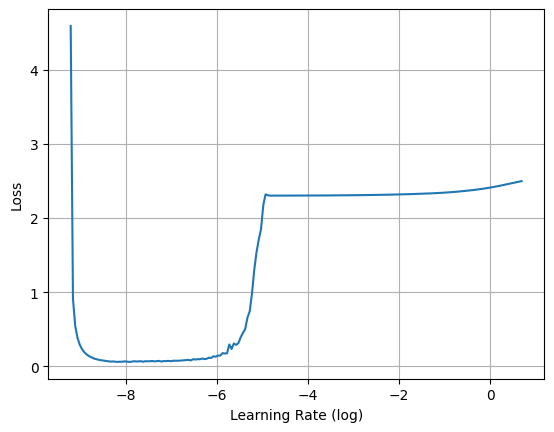

In [221]:
# Plot it
loss_schedule = np.array(history.history["loss"])
plot_lr_loss(lr_schedule, loss_schedule)

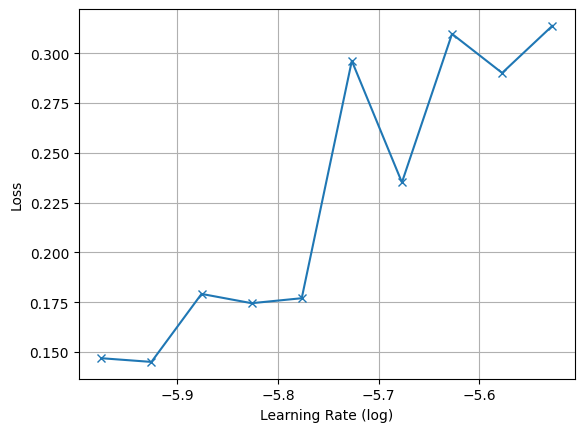

In [226]:
# Narrow it down
new_indices = (np.log(lr_schedule) > -6) & (np.log(lr_schedule) < -5.5)

plot_lr_loss(lr_schedule[new_indices], loss_schedule[new_indices], style="-x") 

In [234]:
# The first value divided by 10 should be the learning rate for this specific FNN
new_indices = (np.log(lr_schedule) > -5.9) & (np.log(lr_schedule) < -5.8)
print(lr_schedule[new_indices])
lr = float(lr_schedule[new_indices][0] / 10)
print("Learning rate to be used:", lr)

[0.00280599 0.00294916]
Learning rate to be used: 0.0002805985859595239


In [236]:
# Train model aiming for 98% accuracy on the validation set
model = make_model_mnist(50, 3)

early_stop_cb = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

adam = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=adam,
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=150,
          batch_size=32,
          callbacks=[early_stop_cb]
)

Epoch 1/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.7223 - loss: 2.1785 - val_accuracy: 0.8522 - val_loss: 0.5848
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8851 - loss: 0.4393 - val_accuracy: 0.9071 - val_loss: 0.3487
Epoch 3/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2840 - val_accuracy: 0.9281 - val_loss: 0.2663
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9391 - loss: 0.2118 - val_accuracy: 0.9377 - val_loss: 0.2354
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9510 - loss: 0.1700 - val_accuracy: 0.9420 - val_loss: 0.2201
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9578 - loss: 0.1423 - val_accuracy: 0.9463 - val_loss: 0.1960
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9634 - loss: 0.1235 - val_accuracy: 0.9472 - val_loss: 0.1988
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 

Val_accuracy reached 96% almost 98%... so I will try more units per layer (150)

In [237]:
# Find a good learning rate by training each epoch for each learning rate on the list
lr_schedule = np.geomspace(1e-4, 2, 200, dtype=np.float32)
history = history_test_lr(lr_schedule, X_train, y_train, units=150, layers=3, batch_size=32)

batches per epoch: 1875
Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8200 - loss: 2.8350
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9138 - loss: 0.6794
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9395 - loss: 0.3693
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.2269
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1581
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.1225
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.1001
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0867
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9804 - loss: 0.0804
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0759
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.

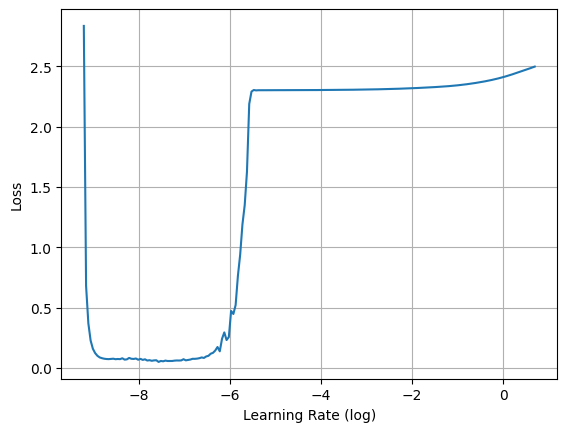

In [238]:
# Plot it
loss_schedule = np.array(history.history["loss"])
plot_lr_loss(lr_schedule, loss_schedule)

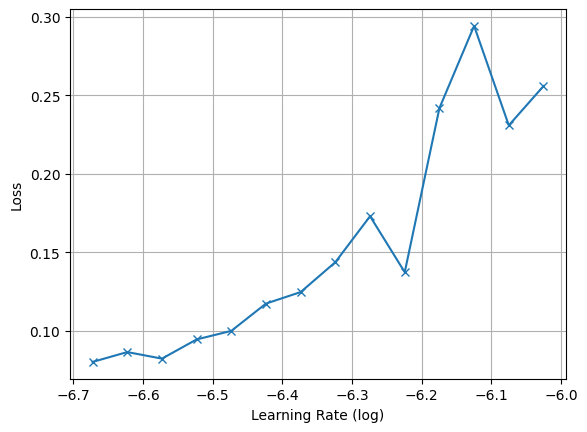

In [240]:
# Narrow it down
new_indices = (np.log(lr_schedule) > -6.7) & (np.log(lr_schedule) < -6)

plot_lr_loss(lr_schedule[new_indices], loss_schedule[new_indices], style="-x") 

In [242]:
# The second value divided by 10 should be the learning rate for this specific FNN
new_indices = (np.log(lr_schedule) > -6.6) & (np.log(lr_schedule) < -6.5)
print(lr_schedule[new_indices])
lr = float(lr_schedule[new_indices][1] / 10)
print("Learning rate to be used:", lr)

[0.00139798 0.00146931]
Learning rate to be used: 0.00014693108096253127


In [244]:
# Train model aiming for 98% accuracy on the validation set
model = make_model_mnist(150, 3)

early_stop_cb = tf.keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

adam = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=adam,
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=150,
          batch_size=32,
          callbacks=[early_stop_cb]
)

Epoch 1/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8291 - loss: 2.4579 - val_accuracy: 0.8992 - val_loss: 0.7959
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9232 - loss: 0.5186 - val_accuracy: 0.9233 - val_loss: 0.5088
Epoch 3/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9453 - loss: 0.2898 - val_accuracy: 0.9362 - val_loss: 0.3892
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9596 - loss: 0.1854 - val_accuracy: 0.9473 - val_loss: 0.3366
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9688 - loss: 0.1336 - val_accuracy: 0.9495 - val_loss: 0.3329
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9739 - loss: 0.1031 - val_accuracy: 0.9511 - val_loss: 0.3068
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9779 - loss: 0.0808 - val_accuracy: 0.9578 - val_loss: 0.2919
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0

In [245]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.2624


[0.26237714290618896, 0.9656999707221985]

Not good enough, I will increase units and layers (200 units per layer, 4 hidden layers instead of 3) 

In [246]:
# Find a good learning rate by training each epoch for each learning rate on the list
lr_schedule = np.geomspace(1e-4, 2, 200, dtype=np.float32)
history = history_test_lr(lr_schedule, X_train, y_train, units=200, layers=4, batch_size=32)

batches per epoch: 1875
Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8302 - loss: 1.7039
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9241 - loss: 0.3715
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9516 - loss: 0.1958
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9647 - loss: 0.1299
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9723 - loss: 0.0975
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9764 - loss: 0.0783
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0710
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9804 - loss: 0.0673
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0604
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0569
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9837 - loss: 0

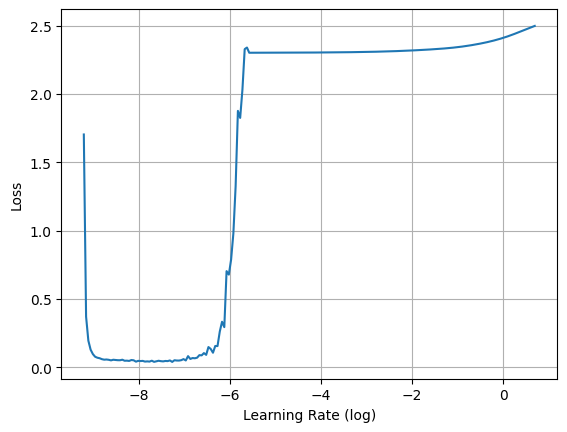

In [247]:
# Plot it
loss_schedule = np.array(history.history["loss"])
plot_lr_loss(lr_schedule, loss_schedule)

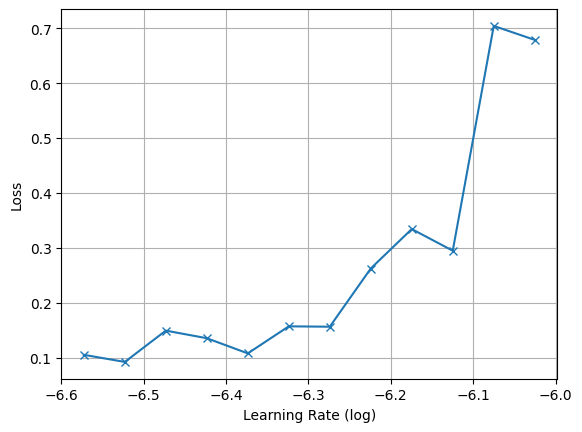

In [249]:
# Narrow it down
new_indices = (np.log(lr_schedule) > -6.6) & (np.log(lr_schedule) < -6)

plot_lr_loss(lr_schedule[new_indices], loss_schedule[new_indices], style="-x") 

In [250]:
# The second value divided by 10 should be the learning rate for this specific FNN
new_indices = (np.log(lr_schedule) > -6.4) & (np.log(lr_schedule) < -6.3)
print(lr_schedule[new_indices])
lr = float(lr_schedule[new_indices][1] / 10)
print("Learning rate to be used:", lr)

[0.0017059  0.00179294]
Learning rate to be used: 0.00017929432215169072


In [255]:
%%time
# Train model aiming for 98% accuracy on the validation set
model = make_model_mnist(200, 4)

early_stop_cb = tf.keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

adam = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=adam,
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=150,
          batch_size=32,
          callbacks=[early_stop_cb]
)

Epoch 1/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8594 - loss: 1.2554 - val_accuracy: 0.9146 - val_loss: 0.4173
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9374 - loss: 0.2835 - val_accuracy: 0.9289 - val_loss: 0.3045
Epoch 3/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9552 - loss: 0.1747 - val_accuracy: 0.9210 - val_loss: 0.3628
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9656 - loss: 0.1262 - val_accuracy: 0.9528 - val_loss: 0.2074
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9737 - loss: 0.0945 - val_accuracy: 0.9500 - val_loss: 0.2452
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9775 - loss: 0.0792 - val_accuracy: 0.9627 - val_loss: 0.1818
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0661 - val_accuracy: 0.9593 - val_loss: 0.2153
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9830 - loss:

In [256]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.1776


[0.1775677353143692, 0.9728000164031982]

I will try one more time before moving on to next part. Increasing units per layer to 250, number of layers to 5, and normalize = True

In [269]:
# Find a good learning rate by training each epoch for each learning rate on the list. Reducing the range and schedule size
lr_schedule = np.geomspace(1e-5, 0.01, 100, dtype=np.float32)
history = history_test_lr(lr_schedule, X_train, y_train, units=250, layers=5, batch_size=32, normalize=True)

batches per epoch: 1875
Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7275 - loss: 1.0301
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9056 - loss: 0.3226
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9283 - loss: 0.2433
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9402 - loss: 0.2025
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9492 - loss: 0.1736
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9563 - loss: 0.1508
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9617 - loss: 0.1319
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9664 - loss: 0.1157
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9704 - loss: 0.1017
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9740 - loss: 0.0893
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9776

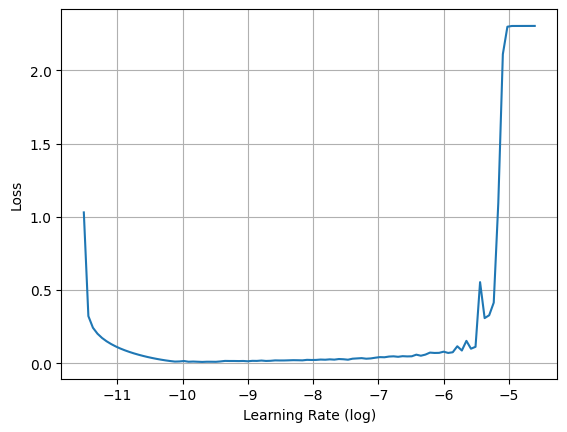

In [270]:
# Plot it
loss_schedule = np.array(history.history["loss"])
plot_lr_loss(lr_schedule, loss_schedule)

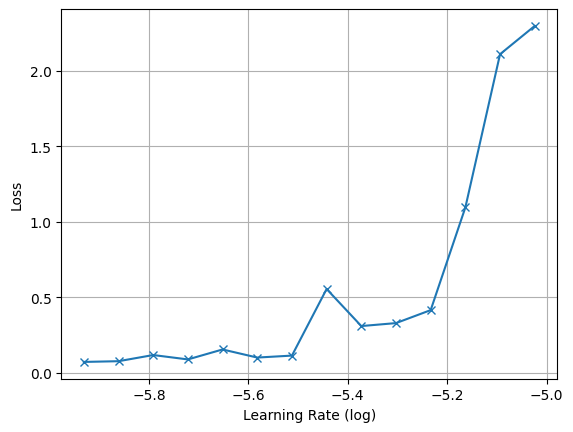

In [271]:
# Narrow it down
new_indices = (np.log(lr_schedule) > -6) & (np.log(lr_schedule) < -5)

plot_lr_loss(lr_schedule[new_indices], loss_schedule[new_indices], style="-x") 

In [272]:
# The third value divided by 10 should be the learning rate for this specific FNN
new_indices = (np.log(lr_schedule) > -5.6) & (np.log(lr_schedule) < -5.4)
print(lr_schedule[new_indices])
lr = float(lr_schedule[new_indices][2] / 10)
print("Learning rate to be used:", lr)

[0.00376494 0.00403702 0.00432876]
Learning rate to be used: 0.0004328761133365333


In [273]:
%%time
# Train model aiming for 98% accuracy on the validation set
model = make_model_mnist(250, 5, normalize=True)
model.layers[1].adapt(X_train)

early_stop_cb = tf.keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

adam = tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=adam,
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=150,
          batch_size=32,
          callbacks=[early_stop_cb]
)

Epoch 1/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9302 - loss: 0.2314 - val_accuracy: 0.9601 - val_loss: 0.1263
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9700 - loss: 0.0998 - val_accuracy: 0.9668 - val_loss: 0.1263
Epoch 3/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9797 - loss: 0.0671 - val_accuracy: 0.9717 - val_loss: 0.1067
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9844 - loss: 0.0522 - val_accuracy: 0.9732 - val_loss: 0.1007
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9745 - val_loss: 0.1037
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9747 - val_loss: 0.1121
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9724 - val_loss: 0.1370
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9923 -

In [274]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.1007


[0.10066838562488556, 0.9732000231742859]

The best parameters yield 0.9732 accuracy on the validation set, but in one of the iterations (21st epoch) it reached 0.9805 accuracy  

Now using, doing random search using keras_tuner and using tensorboard for visualization

In [285]:
# creating my own Hyper Model class to both build a model and do normalization
class MyClassificationHyperModel2(kt.HyperModel):
    def build(self, hp):
        n_hidden = hp.Int("n_hidden", min_value=3, max_value=8, default=5)
        n_neurons = hp.Int("n_neurons", min_value=64, max_value=512, default=128)
        learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-2, sampling="log")
        optimizer = hp.Choice("optimizer", values=["adam", "adagrad"])
        if optimizer == "adam":
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        else:
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
    
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten())
        for _ in range(n_hidden):
            model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    
        model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
        model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=optimizer,
                      metrics=["accuracy"]
                     )
        
        return model

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            norm_layer.adapt(X)
            X = norm_layer(X)

        return model.fit(X, y, **kwargs)

In [286]:
random_search_tuner = kt.RandomSearch(
    MyClassificationHyperModel2(), objective="val_accuracy", max_trials=15, overwrite=True,
    directory="mnist_q10", project_name="random_search_q10", seed=42)

In [289]:
root_logdir = Path(random_search_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("checkpoints_q10_mnist.weights.h5", save_weights_only=True)

random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_test, y_test),
                           callbacks=[tensorboard_cb, early_stopping_cb, checkpoint_cb])

Trial 15 Complete [00h 03m 11s]
val_accuracy: 0.9047999978065491

Best val_accuracy So Far: 0.9768000245094299
Total elapsed time: 00h 37m 43s


See tensorboard:

In [291]:
%load_ext tensorboard
%tensorboard --logdir=./mnist_q10/random_search_q10/tensorboard

In [290]:
top_param = random_search_tuner.get_best_hyperparameters(num_trials=1)[0]
top_param.values

{'n_hidden': 5,
 'n_neurons': 480,
 'learning_rate': 0.00021647994826791666,
 'optimizer': 'adam',
 'normalize': False}

In [295]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("checkpoints_q10_mnist.weights.h5", save_weights_only=True)

history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9894 - loss: 0.0389 - val_accuracy: 0.9717 - val_loss: 0.1539
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9905 - loss: 0.0343 - val_accuracy: 0.9739 - val_loss: 0.1391
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9912 - loss: 0.0334 - val_accuracy: 0.9759 - val_loss: 0.1115
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9926 - loss: 0.0276 - val_accuracy: 0.9755 - val_loss: 0.1337
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9927 - loss: 0.0257 - val_accuracy: 0.9772 - val_loss: 0.1267
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.9934 - loss: 0.0261 - val_accuracy: 0.9777 - val_loss: 0.1290
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9935 - loss: 0.0250 - val_accuracy: 0.9789 - val_loss: 0.1139
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 

In [296]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9759 - loss: 0.1115


[0.11148031055927277, 0.9758999943733215]

Because of early stopping the final model does not have 98%+ accuracy but it reached that much accuracy in the last epochs

## Solution to question 10: 

The book's website only has the solution for first part of question 10

Let's load the dataset:

In [297]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [299]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [300]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [304]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] / 255., y_train_full[5000:]
X_test = X_test / 255.


Let's plot an image using Matplotlib's imshow() function, with a 'binary' color map:

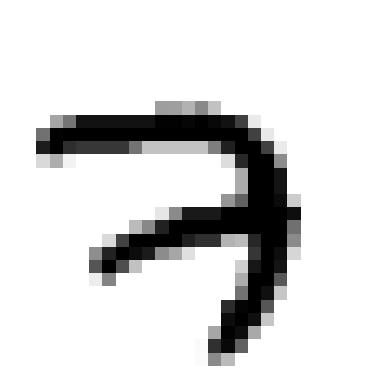

In [305]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a class_names array:

In [303]:
y_train

array([7, 3, 4, ..., 5, 6, 8], shape=(55000,), dtype=uint8)

X_valid.shape

In [306]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

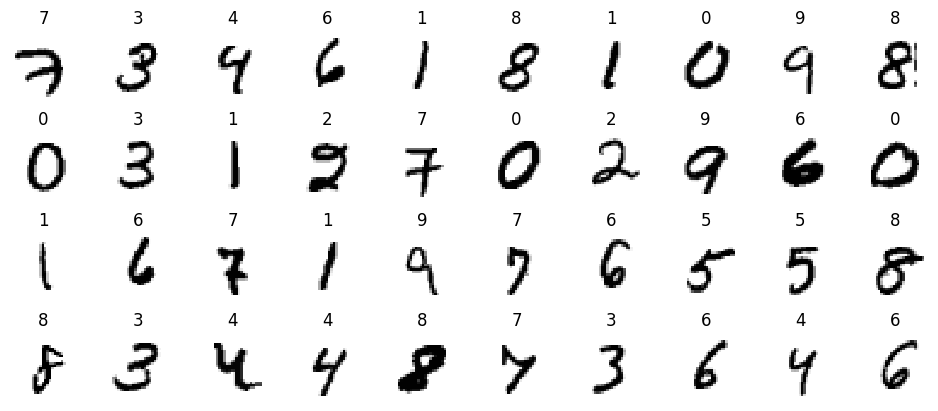

In [308]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [326]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [327]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [328]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [329]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch

In [330]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5876 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

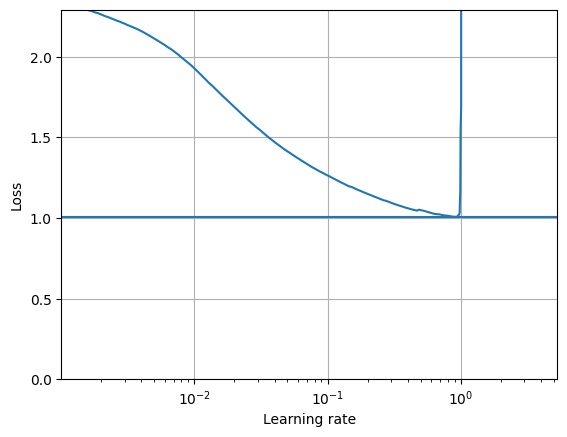

In [334]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [336]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [337]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [344]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [345]:
run_index = 1 # increment this at every turn
run_logdir = Path() / "mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('mnist_logs/run_001')

In [346]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9265 - loss: 0.2368 - val_accuracy: 0.0952 - val_loss: 11.2004
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9720 - loss: 0.0933 - val_accuracy: 0.0948 - val_loss: 13.3670
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.0944 - val_loss: 15.4773
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.0948 - val_loss: 17.3430
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.0942 - val_loss: 19.3225
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9917 - loss: 0.0265 - val_accuracy: 0.0950 - val_loss: 21.4954
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.0954 - val_loss: 23.5406
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.99

In [347]:
model = tf.keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0892 - loss: 2.3721


[2.3721065521240234, 0.08919999748468399]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [349]:
%tensorboard --logdir=./mnist_logs

The solution to this question seems a bit rushed but I can still see some of the mistakes I made. I did not split the training set into training and validation sets. I thought about just using train and test sets but I should have used 3 sets. About finding a good learning rate, the book said to update the leraning rate every "iteration" so I thought each iteration wan an entire epoch, but an iteration is a batch. Also, I should have done some data visualization in the beginning of code.

This concludes chapter 10